In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [6]:
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

In [8]:
# Read reference image
imageFile1 = "scene1.jpg"
print("Reading First image : ", imageFile1)
im1 = cv2.imread(imageFile1, cv2.IMREAD_COLOR)

Reading First image :  scene1.jpg


In [10]:
# Read image to be aligned
imageFile2 =  "scene3.jpg"
print("Reading Second Image : ", imageFile2);
im2 = cv2.imread(imageFile2, cv2.IMREAD_COLOR)

Reading Second Image :  scene3.jpg


In [11]:
# Convert images to grayscale
im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

# Detect ORB features and compute descriptors.
orb = cv2.ORB_create(MAX_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

In [12]:
im1Keypoints = np.array([])
im1Keypoints = cv2.drawKeypoints(im1, keypoints1, im1Keypoints, color=(0,0,255),flags=0)
print("Saving Image with Keypoints")
cv2.imwrite("keypoints.jpg", im1Keypoints)

Saving Image with Keypoints


True

Text(0.5, 1.0, 'Keypoints obtained from the ORB detector')

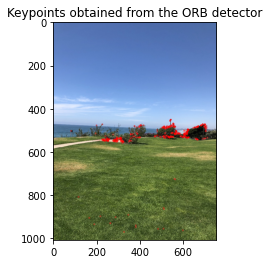

In [13]:
plt.imshow(im1Keypoints[:,:,::-1])
plt.title("Keypoints obtained from the ORB detector")

In [14]:
# Match features.
matcher = cv2.DescriptorMatcher_create(
                cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)

# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
matches = matches[:numGoodMatches]

# Draw top matches
imMatches = cv2.drawMatches(im1, keypoints1,
                            im2, keypoints2, 
                            matches, None)

Text(0.5, 1.0, 'Matchings obtained from the descriptor matcher')

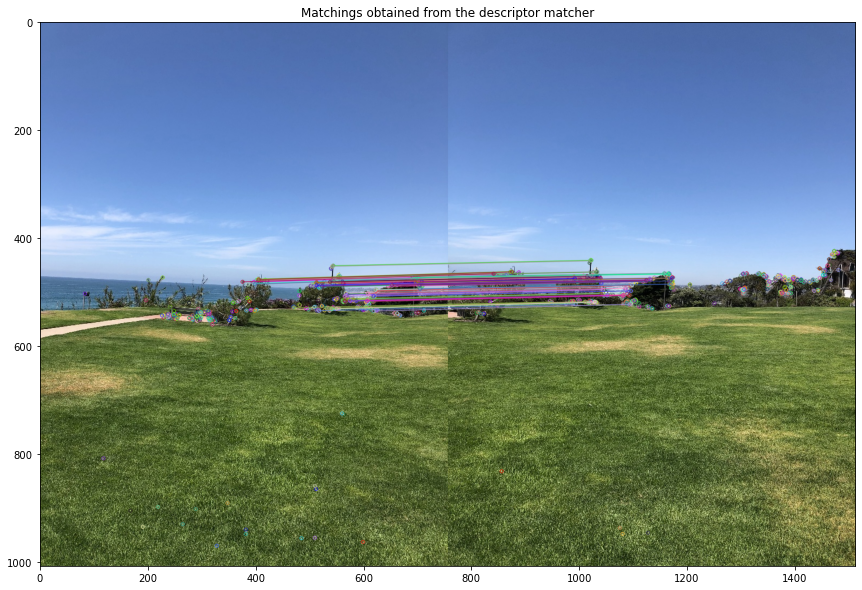

In [15]:
plt.figure(figsize=[15,10])
plt.imshow(imMatches[:,:,::-1])
plt.title("Matchings obtained from the descriptor matcher")

In [16]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)
print("Homograhy matrix \n{}".format(h))

Homograhy matrix 
[[ 6.27042436e-01 -6.33135615e-02  3.18436186e+02]
 [-2.07449647e-01  7.91231125e-01  8.49774260e+01]
 [-3.97631842e-04 -1.23407296e-04  1.00000000e+00]]


In [17]:
# Use homography
im1Height, im1Width, channels = im1.shape
im2Height, im2Width, channels = im2.shape

im2Aligned = cv2.warpPerspective(im2, h, 
                            (im2Width + im1Width, im2Height))

Text(0.5, 1.0, 'Second image aligned to first image obtained using homography and warping')

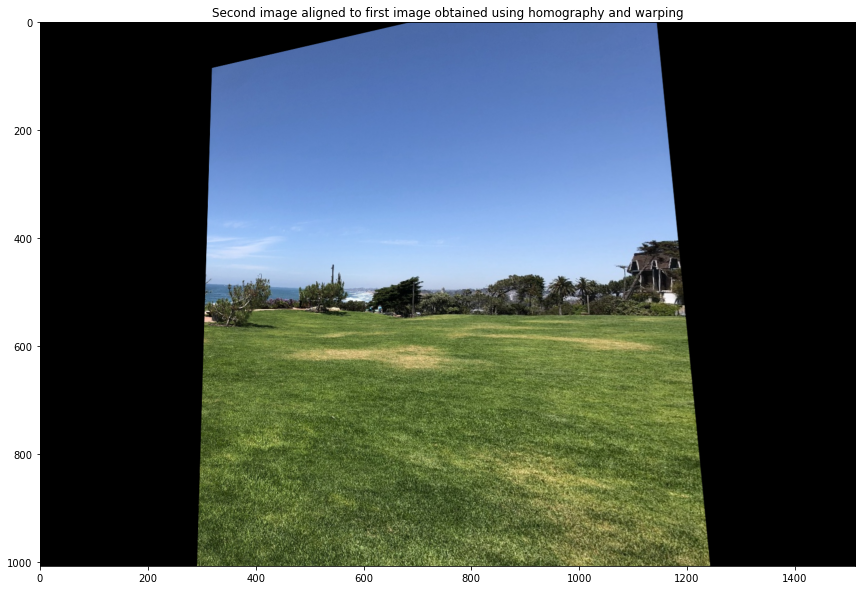

In [18]:
plt.figure(figsize=[15,10])
plt.imshow(im2Aligned[:,:,::-1])
plt.title("Second image aligned to first image obtained using homography and warping")

In [19]:
# Stitch Image 1 with aligned image 2
stitchedImage = np.copy(im2Aligned)
stitchedImage[0:im1Height,0:im1Width] = im1

Text(0.5, 1.0, 'Final Stitched Image')

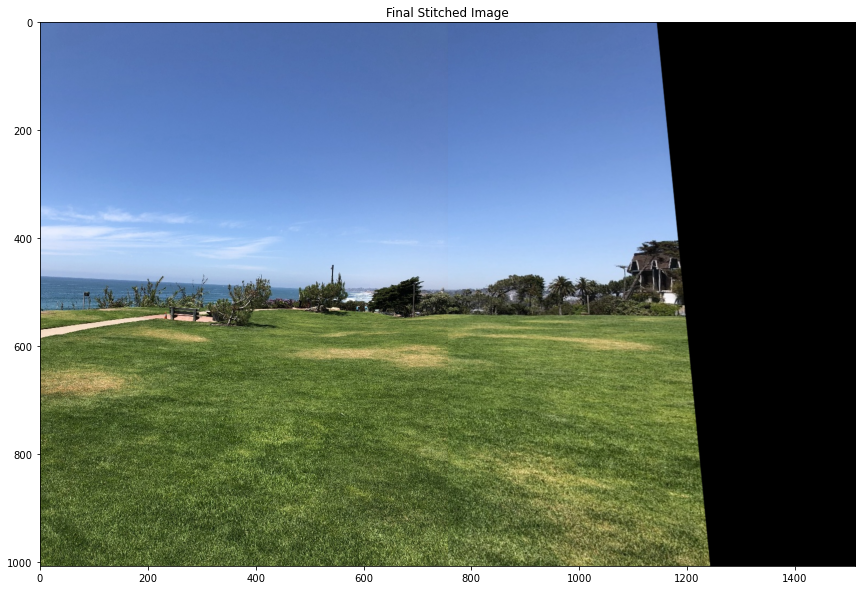

In [20]:
plt.figure(figsize=[15,10])
plt.imshow(stitchedImage[:,:,::-1])
plt.title("Final Stitched Image")